###### Анализ доходов в Jupyter Notebook
за период с 4 февраля 2019 года по 5 февраля 2020 года

In [1]:
%matplotlib inline

import analyze
from parse import incomes
import matplotlib.pyplot as plt

incomes_list = incomes()

for i in range(5):
    name = incomes_list[i]['name']
    date_to_plot = incomes_list[i]['date_to_plot']
    summ = incomes_list[i]['summ']
    cat = incomes_list[i]['cat']
    print(name, date_to_plot, summ, cat)
    
print('...')

(79, 8, 1, 0)
Расчет при увольнении 2020-02-05 00:00:00 4266.76 Прочие поступления
Расчет при увольнении 2020-02-05 00:00:00 9558.44 Прочие поступления
TINKOFF BANK 2020-01-26 00:00:00 1080.0 Перевод на карту
Зачисление стипендии 2020-01-24 00:00:00 3332.0 Прочие поступления
Зачисление стипендии 2020-01-24 00:00:00 3332.0 Прочие поступления
...


- Всего поступлений:

In [2]:
print(len(incomes_list))

88


... на сумму:

In [3]:
s = 0
for i in incomes_list:
    s += i['summ']
    
print(s // 1)

370563.0


- График Scatter всех зачислений за период

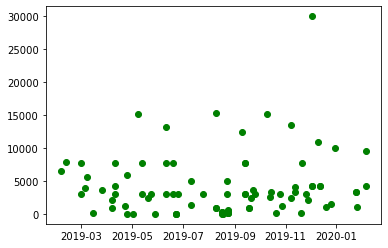

<Figure size 864x864 with 0 Axes>

In [4]:
%matplotlib inline

DATES = [d['date_to_plot'] for d in incomes_list]
SUMS = [s['summ'] for s in incomes_list]

plt.scatter(DATES, SUMS, color='g')
# plt.savefig('./outputs/incomes_scatter.png')
width = 12
height = 12
plt.figure(figsize=(width, height))
# plt.rcParams['figure.dpi'] = 150 # default for me was 75
plt.show()

- Средняя месячная зар. плата:

In [5]:
average = sum(SUMS)/12
print(average)

30880.28916666667


- Столбчатая диаграмма помесячно

In [6]:
per_month_list = analyze.plot_per_month(incomes_list)

for i in range(len(per_month_list)):
    print(i+1, per_month_list[i])

1 7744.0
2 28185.38
3 24034.5
4 25518.5
5 31556.510000000002
6 37983.74
7 9464.52
8 28272.39
9 45242.14
10 25477.86
11 36440.49
12 70643.44


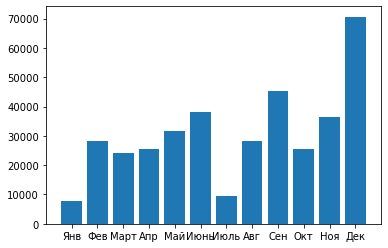

<Figure size 1440x720 with 0 Axes>

In [7]:
monthes_axis = ('Янв', 'Фев', 'Март', 'Апр', 'Май', 'Июнь', 'Июль', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек')
plt.bar(monthes_axis, per_month_list)
plt.figure(figsize=(20,10))
plt.show()

Декабрь оказался самым доходным месяцем. Сентябрь - две стипендии.
*Сразу видно, что январь и июль - месяца после сессии, хе-хе*

- Все уникальные наименования поступлений:

In [8]:
names = analyze.get_names(incomes_list)
for n in names:
    print(n)

SBOL перевод 2202****9451 Д. ВЕРОНИКА ИГОРЕВНА
SBOL перевод 4276****1986 Я. ИННОКЕНТИЙ БОРИСОВИЧ
SBOL перевод 5469****9296 Д. НАТАЛИЯ СЕРГЕЕВНА
SBOL перевод 2202****4128 Г. ДИАНА РАФАИЛОВНА
SBOL перевод 4276****8240 Д. ИГОРЬ АЛЕКСЕЕВИЧ
SBOL перевод 5336****1487 М. ДМИТРИЙ ДМИТРИЕВИЧ
SBOL перевод 5469****8072 Г. НИКИТА ЮРЬЕВИЧ
SBOL перевод 2202****6569 Д. ЕЛЕНА ЮРЬЕВНА
SBOL перевод 5469****2611 В. МАРИЯ ВЛАДИМИРОВНА
SBOL перевод 4276****8447 Л. ЕЛИСЕЙ АЛЕКСАНДРОВИЧ
SBOL перевод 6762****5914 К. АБДРАХМАН ТОХТИЕВИЧ
SBOL перевод 5469****3493 А. ЕВГЕНИЙ ВИКТОРОВИЧ
SBOL перевод 4276****8975 В. АЛИ САЛМАН ОГЛЫ
Прочие выплаты
Командировочные
SBOL перевод 6390****3939 С. АНАСТАСИЯ АНДРЕЕВНА
TINKOFF BANK
Зачисление зарплаты
SBOL перевод 5469****8584 Ш. АЛЕКСЕЙ АЛЕКСЕЕВИЧ
Отпускные
Зачисление стипендии
SBOL перевод 4276****6357 Е. ЕКАТЕРИНА ВИКТОРОВНА
SBOL перевод 5469****2982 М. АРТЕМ КОНСТАНТИНОВИЧ
SBOL перевод 5469****8841 Д. ЕЛЕНА ЮРЬЕВНА
SBOL перевод 4276****1155 Ш. ТАТЬЯНА ВЛАДИСЛАВОВНА
SBO

- Суммы по категориям:

In [9]:
incomes_by_category = analyze.count_categories(incomes_list)

for k, v in incomes_by_category.items():
    print(k,":", v)

Стипендия : 114347
Зарплата : 170472
От физ. лиц : 62489
Отпускные : 8854
Прочее : 14400


- Круговая диаграмма доходов по категориям:

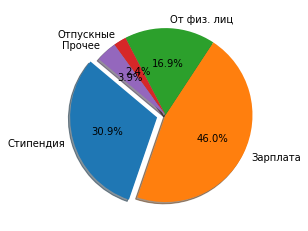

In [10]:
amounts = [v for v in incomes_by_category.values()]
labels = [k for k in incomes_by_category.keys()]

explode = (0.1, 0, 0, 0, 0)  # explode 1st slice
plt.pie(amounts, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

- Количество транзакций/поступлений по месяцам:
##### Ахтунг! построения могут быть не совсем корректны, потому что февраль захватывается дважды, в 2019 и 2020 годах

[3, 4, 6, 8, 7, 9, 3, 15, 10, 6, 8, 9]


d:\pycharmprojects\my_spends_and_incomes\venv\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  """


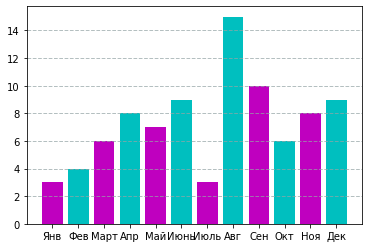

In [11]:
transactions_per_month = analyze.transactions_per_month(incomes_list)
print(transactions_per_month)

my_colors = 'mc'*6
plt.bar(monthes_axis, transactions_per_month, color = my_colors)
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)


- Интересует количество переводов от физ. лиц:

[1, 0, 2, 3, 2, 3, 1, 13, 3, 2, 0, 1]


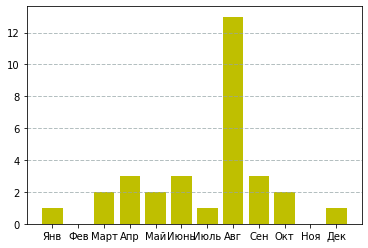

In [12]:
transactions_from_others = analyze.transactions_per_month_from_others(incomes_list)
print(transactions_from_others)

plt.bar(monthes_axis, transactions_from_others, color = 'y')
# plt.set_yticks(range(10, 2))
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)

Видно, когда Евгений больше всего развлекался)

- Количество поступлений по суммам: 


    от 0 до 10к,
    от 10к до 20к,
    от 20к до 30к и
    свыше 30 к.

In [13]:
transactions_by_sum = analyze.num_of_incomes_less_then(incomes_list)
print(transactions_by_sum)

(79, 8, 1, 0)


Что, в общем-то, согласуется с гарфиком Scatter. Суммы меньше 10к - это переводы друзей, всякие субсидии и стипендия. От 10 до 20 - условно зарплата. Ну а 30...

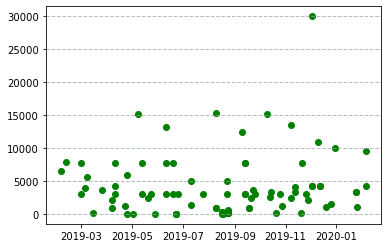

In [14]:
plt.scatter(DATES, SUMS, color='g')
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)